# <font color='#31394d'>Linear Regression Practice Exercises</font>


For this exercise, we'll be using the carseats dataset that is provided as a csv file in the `data` folder.

We will attempt to predict child car seat sales (the `Sales` variable) based on a number of predictors using data from 400 different locations. The dataset includes qualitative predictors such as `Shelveloc`, an indicator of the quality of the shelving location; that is, the space within each store in which the car seat is displayed. The predictor `Shelveloc` takes on three possible values: Bad, Medium, and Good. `US` and `Urban` are also categorical (binary) features.

🚀 <font color='#d9c4b1'> Exercise: </font> Import and examine the data. Don't forget to import the necessary packages!

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/carseats.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [43]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


Now let's do some basic exploratory data analysis.

🚀 <font color='#d9c4b1'> Exercise: </font> Determine which columns are numerical and examine their distributions. Look for outliers. Can you see any strong relationships, particularly with the `Sales` outcome?

In [44]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
Age              int64
Education        int64
dtype: object

In [45]:
numeric_features.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13


array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'CompPrice'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Advertising'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>, <AxesSubplot:>]],
      dtype=object)

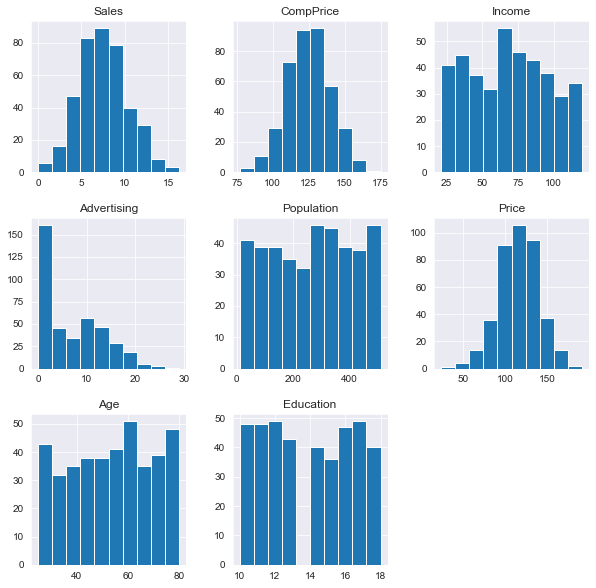

In [46]:
numeric_features.hist(figsize=(10,10))

<AxesSubplot:>

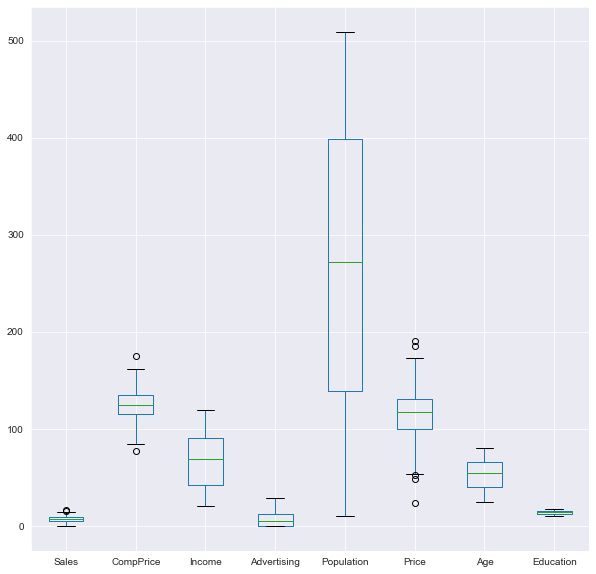

In [47]:
numeric_features.boxplot(figsize=(10,10))

In [48]:
numeric_features.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


There is a strong correlation between `Price` and `Sales`. Higher prices seem to be associated with lower sales.

The `Income` and `Advertising` variables also seem to be correlated with `Sales`. Higher income and advertising budgets seem to be associated with higher sales.


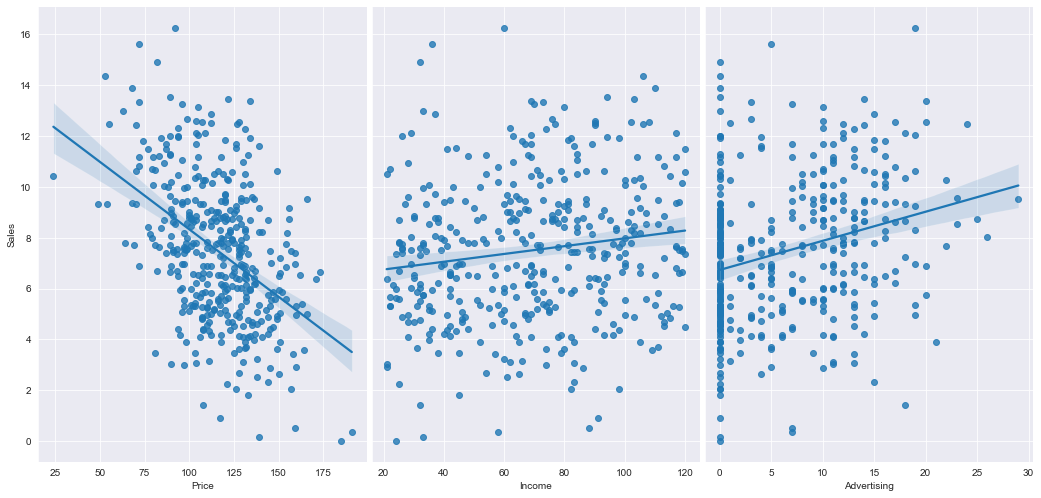

In [49]:
import seaborn as sns
sns.pairplot(df, x_vars=['Price', 'Income', 'Advertising'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

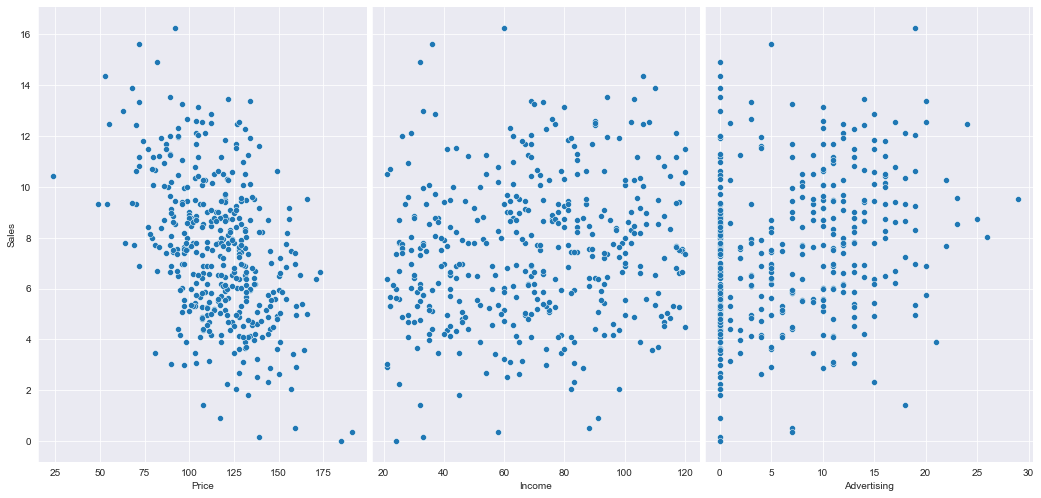

In [50]:
sns.pairplot(df, x_vars=['Price', 'Income', 'Advertising'], y_vars='Sales', height=7, aspect=0.7, kind='scatter')

🚀 <font color='#d9c4b1'> Exercise: </font> For the categorical variables, check how many observations are in each category. How does carseat sales vary by category?

In [51]:
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.dtypes

C:\Users\danww\AppData\Local\Temp\ipykernel_10188\3540771029.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object])


ShelveLoc    object
Urban        object
US           object
dtype: object

In [52]:
categorical_features.head()

,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes
2,Medium,Yes,Yes
3,Medium,Yes,Yes
4,Bad,Yes,No


In [53]:
categorical_features['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [54]:
categorical_features['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [55]:
categorical_features['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [57]:
for column_name in categorical_features:
    unique_category = len(df[column_name].unique())
    print(f'{column_name} has {unique_category} unique categories')

ShelveLoc has 3 unique categories
Urban has 2 unique categories
US has 2 unique categories


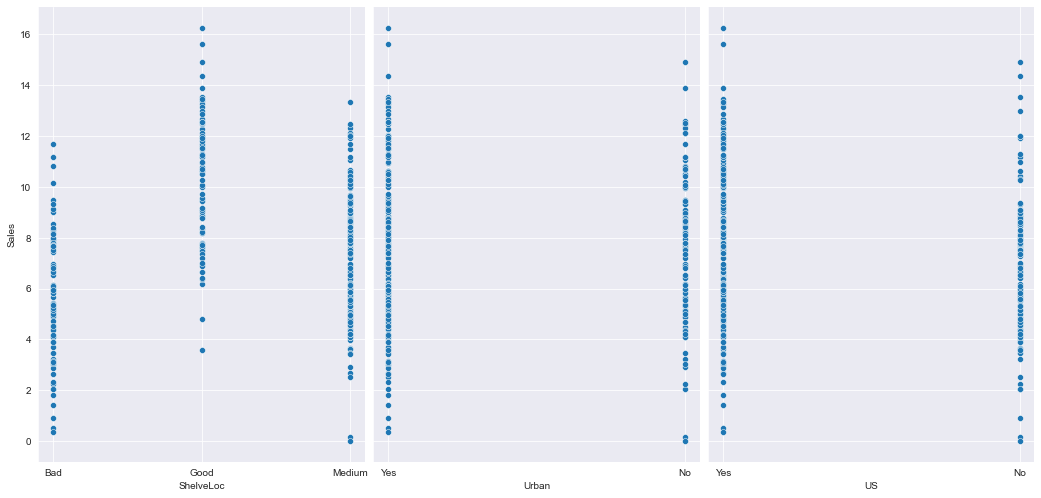

In [58]:
sns.pairplot(df, x_vars=['ShelveLoc', 'Urban', 'US'], y_vars='Sales', height=7, aspect=0.7)

To get ready to fit a linear regression model, we must first use one-hot encoding to convert our categorical variables into dummies. Read more about one-hot encoding here! https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

🚀 <font color='#d9c4b1'> Exercise: </font> Use the `pd.get_dummies` function to do this. If you don't know how to use this function, try looking at its help page with `?pd.get_dummies`. Don't forget to choose a reference category and omit this column from the dataset.

In [62]:
# perform one hot encoding on the dataframe
encoded_data = pd.get_dummies(df)

Great - all the columns are now numerical! We are ready to fit our first linear regression model.

Begin by importing the `LinearRegression` class. Inspect the help to see what parameters can be set when we instantiate an object of this class and what the default arguments are:

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
?model

Like all supervised learning methods in `sklearn`, the `model` object has a `fit` method for estimating the model parameters (using the training data) and a `predict` method for making predictions on new data (the test data).

🚀 <font color='#d9c4b1'> Exercise: </font> Train a linear model to predict `Sales` using all the other columns in this dataset; that is, estimate the $\beta$ parameters by minimising the RSS loss function on the training data. If you are not sure how to do this, try examining `?model.fit`.

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

y = encoded_data['Sales']
X = encoded_data.drop('Sales', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean squared error: ', mean_squared_error(y_test, y_pred))

Mean squared error:  1.0957938739816335


🚀 <font color='#d9c4b1'> Exercise: </font> Interpret your regression coefficients. Do these correspond to the relationships that you discovered in your exploratory data analysis above?

In [65]:
model.coef_

array([ 8.97058179e-02,  1.50004453e-02,  1.28179675e-01,  2.13076774e-04,
       -9.55056151e-02, -4.81135040e-02, -2.22052106e-02, -2.29738709e+00,
        2.55496272e+00, -2.57575630e-01, -6.75783943e-02,  6.75783943e-02,
        1.52521410e-01, -1.52521410e-01])

🚀 <font color='#d9c4b1'> Exercise: </font> Plot the actual sales versus the predicted sales. Compute the coefficient of determination ($R^2$). Does this seem like a good model?

C:\Users\danww\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


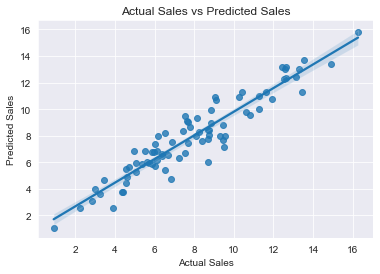

R^2:  0.8892712759554213


In [71]:
sns.regplot(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs Predicted Sales')
plt.show()

print('R^2: ', model.score(X_test, y_test))

This seems like a pretty good model! We can see that the model is able to capture the general trend of the data. However, there are some outliers where the model is not performing as well.

From our exploratory data analysis, we saw that only price and shelf location seem to be strongly associated with sales. All these other features might be making our model unnecessarily complex and harder to productionize.

🚀 <font color='#d9c4b1'> Exercise: </font> Use cross-validation to determine which model is best: the full model above or a simpler model that only includes price and shelf location as features.

In [74]:
from sklearn.model_selection import cross_val_score

y = encoded_data['Sales']
X = encoded_data.drop('Sales', axis=1)

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)
print('Full model: ', scores.mean())

Full model:  0.8597391563449067


Let's try and improve on our simple model...

🚀 <font color='#d9c4b1'> Exercise: </font> Suppose you think that the relationship between sales and price is likely to differ depending on the shelf location. Add an interation effect to your simple model and see if it improves on model performance.

In [75]:
encoded_data['Price*ShelveLoc_Bad'] = encoded_data['Price'] * encoded_data['ShelveLoc_Bad']
encoded_data['Price*ShelveLoc_Good'] = encoded_data['Price'] * encoded_data['ShelveLoc_Good']
encoded_data['Price*ShelveLoc_Medium'] = encoded_data['Price'] * encoded_data['ShelveLoc_Medium']

y = encoded_data['Sales']
X = encoded_data.drop('Sales', axis=1)

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)
print('Full model: ', scores.mean())



Full model:  0.8584158440494333


There is a slight improvement in model performance, but not much.

🚀 <font color='#d9c4b1'> Exercise: </font> Suppose you suspect that there is a quadratic relationship between sales and price. (The exploratory analysis doesn't actually support this, but let's go ahead anyway!) Extend your simple model to include an quadratic term for price and determine if it improves model performance.

In [78]:
encoded_data['Price^2'] = encoded_data['Price'] ** 2

y = encoded_data['Sales']
X = encoded_data.drop('Sales', axis=1)

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)
print('Full model: ', scores.mean())

Full model:  0.8581085971113851
